## Preliminary analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../preprocessed_data/df_preprocessed.csv")
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
print(df.dtypes)
df.tail()

dpm                             float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
fare_amount                     float64
tip_amount                      float64
total_amount                    float64
dtype: object


,dpm,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,fare_amount,tip_amount,total_amount
37379083,12.916667,2019-12-31 23:20:52,2019-12-31 23:25:16,0.72,1.0,238,5.5,0.00,9.30
37379084,9.387755,2019-12-31 23:09:42,2019-12-31 23:22:39,1.47,1.0,68,10.0,0.00,13.80
37379085,10.886598,2019-12-31 23:46:57,2019-12-31 23:50:54,0.97,1.0,233,5.0,1.76,10.56
37379086,5.381818,2019-12-31 23:22:03,2019-12-31 23:29:06,3.30,1.0,262,11.0,2.96,17.76
37379087,6.967742,2019-12-31 23:33:47,2019-12-31 23:40:10,1.55,1.0,137,7.0,0.00,10.80


In [3]:
df.corr()

,dpm,trip_distance,RatecodeID,PULocationID,fare_amount,tip_amount,total_amount
dpm,1.000000,-0.049905,0.124092,0.000706,0.041558,0.017589,0.036832
trip_distance,-0.049905,1.000000,0.462987,-0.098586,0.947629,0.561478,0.930751
RatecodeID,0.124092,0.462987,1.000000,-0.043837,0.502947,0.270033,0.494479
PULocationID,0.000706,-0.098586,-0.043837,1.000000,-0.094010,-0.036819,-0.082493
fare_amount,0.041558,0.947629,0.502947,-0.094010,1.000000,0.587603,0.977555
tip_amount,0.017589,0.561478,0.270033,-0.036819,0.587603,1.000000,0.718222
total_amount,0.036832,0.930751,0.494479,-0.082493,0.977555,0.718222,1.000000


Observed that total_amount is most correlated with fare_amount and trip_distance, and fare_amount is highly correlated with trip_distance. But think a bit further, it's obvious that total_amount equals the sum of fare_amount, tip_amount and all other extra fare/tax/surcharge which were already removed. So the strong linear correlation of total_amount and fare_amount is evident and doesn't have much value in giving taxi driver advise. But trip_distance might be useful to give taxi drivers practical advise to predict earning of a trip.

In a real-world situation, taxi drivers know where they are and what time it is when they pick up passengers. And here, we assume that taxi drivers are also able to give a rough estimatioin of trip distance when passengers tell them the trip destination. And with my understanding, this assumption is not very unrealistic.

### grouping by pickup datetime

In [4]:
gb_dow_hod = df.groupby([df['tpep_pickup_datetime'].dt.dayofweek, df['tpep_pickup_datetime'].dt.hour])

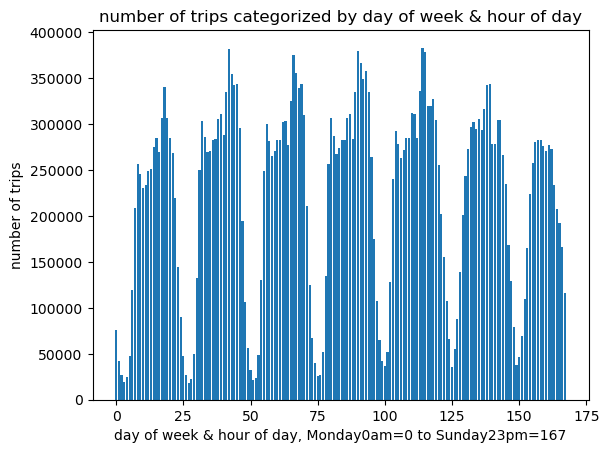

In [5]:
# number of trips groupby day of week and hour of day combined
plt.bar(x=np.arange(len(gb_dow_hod.count()['total_amount'].values)), height=gb_dow_hod.count()['total_amount'].values)
plt.xlabel('day of week & hour of day, Monday0am=0 to Sunday23pm=167')
plt.ylabel('number of trips')
plt.title('number of trips categorized by day of week & hour of day')
plt.savefig("../plots/ntrips_bydow&hod.png")
plt.show()

#### weekdays situation

In [6]:
WD_gb_hod = df.loc[df['tpep_pickup_datetime'].dt.dayofweek.isin([0,1,2,3,4])].groupby([df['tpep_pickup_datetime'].dt.hour])

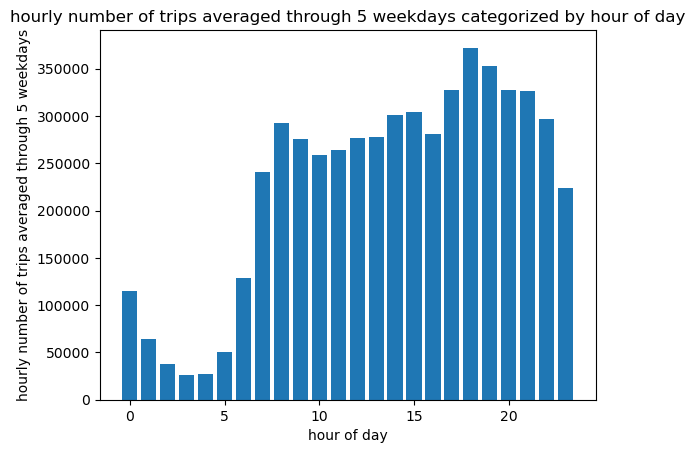

In [7]:
# average number of trips on workday(Monday to Friday) groupby hour of day
plt.bar(x=np.arange(len(WD_gb_hod.count()['total_amount'].values)), height=WD_gb_hod.count()['total_amount'].values/5)
plt.xlabel('hour of day')
plt.ylabel('hourly number of trips averaged through 5 weekdays')
plt.title('hourly number of trips averaged through 5 weekdays categorized by hour of day')
plt.savefig("../plots/WDaverage_ntrips_byhod.png")
plt.show()

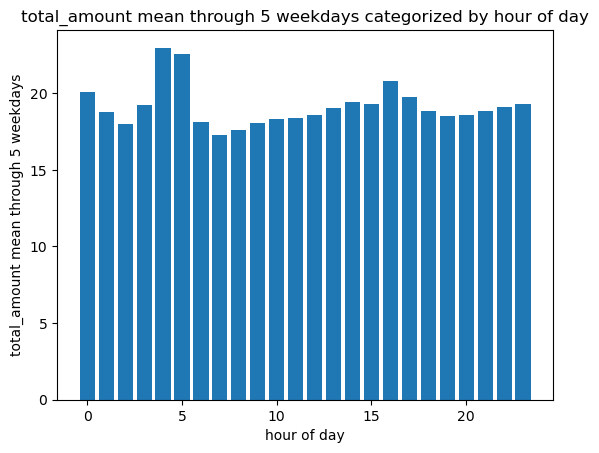

In [8]:
# total_amount mean on workday(Monday to Friday) groupby hour of day
plt.bar(x=np.arange(len(WD_gb_hod.count()['total_amount'].values)), height=WD_gb_hod.mean()['total_amount'].values)
plt.xlabel('hour of day')
plt.ylabel('total_amount mean through 5 weekdays')
plt.title('total_amount mean through 5 weekdays categorized by hour of day')
plt.savefig("../plots/WDtotal-mean_byhod.png")
plt.show()

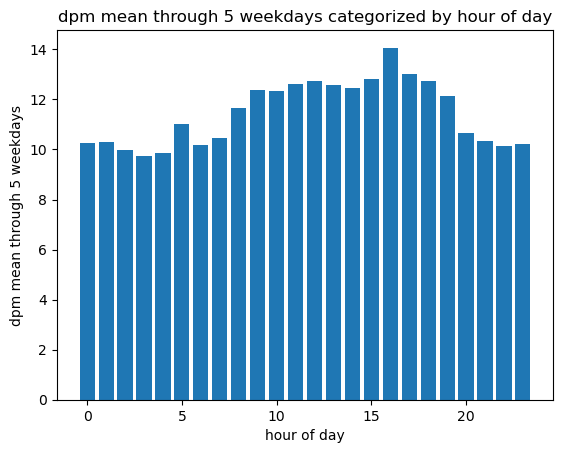

In [9]:
plt.bar(x=np.arange(len(WD_gb_hod.groups.keys())), height=WD_gb_hod.mean()['dpm'].values)
plt.xlabel('hour of day')
plt.ylabel('dpm mean through 5 weekdays')
plt.title('dpm mean through 5 weekdays categorized by hour of day')
plt.savefig("../plots/WDdpm-mean_byhod.png")
plt.show()

#### weekends situation

In [10]:
WE_gb_hod = df.loc[df['tpep_pickup_datetime'].dt.dayofweek.isin([5,6])].groupby([df['tpep_pickup_datetime'].dt.hour])

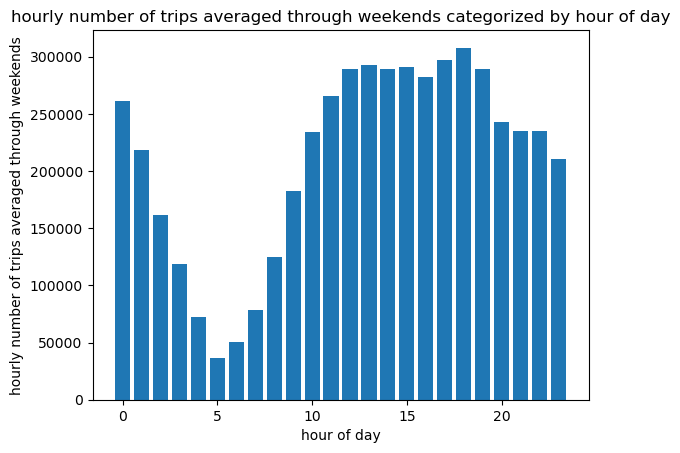

In [11]:
# average number of trips on weekends(Saturday and Sunday) groupby hour of day
plt.bar(x=np.arange(len(WE_gb_hod.count()['total_amount'].values)), height=WE_gb_hod.count()['total_amount'].values/2)
plt.xlabel('hour of day')
plt.ylabel('hourly number of trips averaged through weekends')
plt.title('hourly number of trips averaged through weekends categorized by hour of day')
plt.savefig("../plots/WEaverage_ntrips_byhod.png")
plt.show()

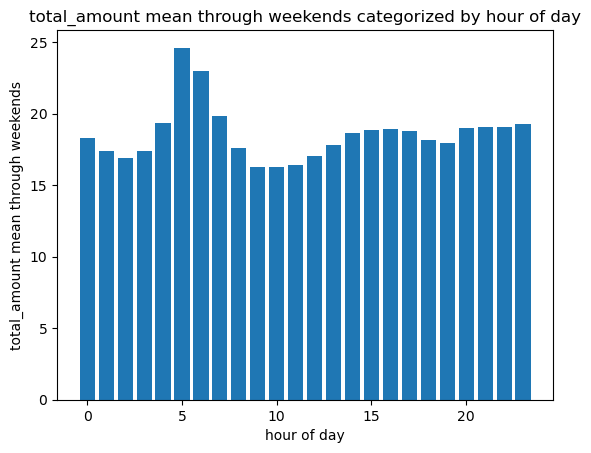

In [12]:
# total_amount mean on weekends(Saturday and Sunday) groupby hour of day
plt.bar(x=np.arange(len(WE_gb_hod.count()['total_amount'].values)), height=WE_gb_hod.mean()['total_amount'].values)
plt.xlabel('hour of day')
plt.ylabel('total_amount mean through weekends')
plt.title('total_amount mean through weekends categorized by hour of day')
plt.savefig("../plots/WEtotal-mean_byhod.png")
plt.show()

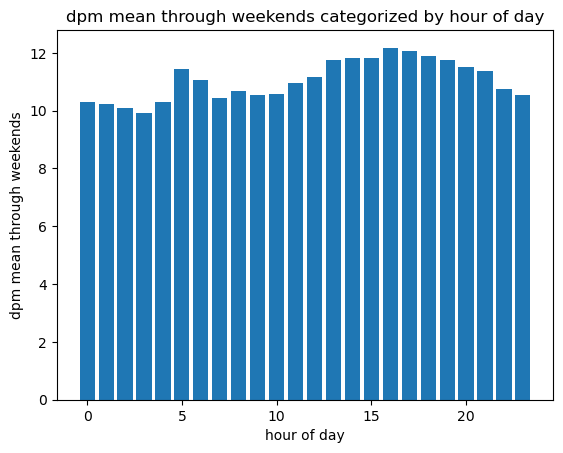

In [13]:
plt.bar(x=np.arange(len(WE_gb_hod.groups.keys())), height=WE_gb_hod.mean()['dpm'].values)
plt.xlabel('hour of day')
plt.ylabel('dpm mean through weekends')
plt.title('dpm mean through weekends categorized by hour of day')
plt.savefig("../plots/WEdpm-mean_byhod.png")
plt.show()

#### trips at  5am has highest total_amount, but lowest number of trips, why?

In [14]:
df.loc[df['tpep_pickup_datetime'].dt.hour==5]['trip_distance'].describe()

count    323826.000000
mean          4.807909
std           5.571414
min           0.010000
25%           1.100000
50%           2.160000
75%           6.380000
max          43.000000
Name: trip_distance, dtype: float64

In [15]:
df.loc[df['tpep_pickup_datetime'].dt.hour!=5]['trip_distance'].describe()

count    3.705526e+07
mean     2.899438e+00
std      3.683561e+00
min      1.000000e-02
25%      9.800000e-01
50%      1.600000e+00
75%      2.970000e+00
max      5.421000e+01
Name: trip_distance, dtype: float64

In [16]:
df.groupby([df['tpep_pickup_datetime'].dt.hour==5, 'RatecodeID']).count()['total_amount']

tpep_pickup_datetime  RatecodeID
False                 1.0           35996215
                      2.0             881043
                      3.0              69690
                      4.0               2536
                      5.0             105744
                      6.0                 34
True                  1.0             292076
                      2.0              25207
                      3.0               3318
                      4.0                 75
                      5.0               3149
                      6.0                  1
Name: total_amount, dtype: int64

### Extract a smaller sample from df for goespatial visualisation

In [4]:
df_small = df.sample(frac=0.5, random_state=1)[['tpep_pickup_datetime','PULocationID','total_amount','trip_distance','tip_amount']]
df_small.insert(1,'pickup_hour',df_small['tpep_pickup_datetime'].dt.hour)
df_small.insert(2,'WD_flag',df_small['tpep_pickup_datetime'].dt.dayofweek.isin([0,1,2,3,4]))
df_small.to_csv('../preprocessed_data/df_small.csv', index=False)
df_small

,tpep_pickup_datetime,pickup_hour,WD_flag,PULocationID,total_amount,trip_distance,tip_amount
37284054,2019-12-31 14:43:30,14,True,229,11.30,1.40,1.00
25603386,2019-11-07 16:01:54,16,True,143,9.80,0.93,1.00
35545849,2019-12-20 20:53:18,20,True,170,8.76,0.47,1.46
20087918,2019-10-14 15:33:23,15,True,186,12.30,1.30,0.00
1379797,2019-01-26 16:59:54,16,False,90,6.95,0.70,1.15
...,...,...,...,...,...,...,...
17795979,2019-10-03 23:28:27,23,True,142,14.75,1.50,2.95
8272394,2019-02-23 23:08:57,23,False,114,10.56,0.43,1.76
35723154,2019-12-21 15:29:42,15,False,230,24.80,5.80,0.00
32140772,2019-12-07 02:56:46,2,False,79,11.00,0.69,2.20


### when and where there's the highest number of trips

In [20]:
# overall top 10 PULocationID and pickup_hour
df.groupby(['PULocationID', df['tpep_pickup_datetime'].dt.hour]).count().sort_values('total_amount', ascending=False)['total_amount'].head(10)

PULocationID  tpep_pickup_datetime
237           18                      125266
              14                      124087
              15                      122267
236           15                      120736
237           17                      119739
161           19                      113559
              18                      111652
237           13                      111209
              12                      110476
162           18                      109783
Name: total_amount, dtype: int64

In [19]:
# top 10 PULocationID and pickup_hour in weekdays
df.loc[df['tpep_pickup_datetime'].dt.dayofweek.isin([0,1,2,3,4])].groupby(['PULocationID', df['tpep_pickup_datetime'].dt.hour]).count().sort_values('total_amount', ascending=False)['total_amount'].head(10)

PULocationID  tpep_pickup_datetime
237           18                      99087
236           15                      96045
237           14                      94801
161           19                      93915
              20                      92691
237           15                      92589
              17                      92519
161           21                      91662
162           18                      89983
161           18                      88489
Name: total_amount, dtype: int64

In [21]:
# top 10 PULocationID and pickup_hour in weekends
df.loc[df['tpep_pickup_datetime'].dt.dayofweek.isin([5,6])].groupby(['PULocationID', df['tpep_pickup_datetime'].dt.hour]).count().sort_values('total_amount', ascending=False)['total_amount'].head(10)

PULocationID  tpep_pickup_datetime
79            1                       48782
              0                       44987
148           1                       40695
              2                       40316
79            2                       39659
237           15                      29678
148           3                       29541
237           14                      29286
236           12                      28858
148           0                       28856
Name: total_amount, dtype: int64

### when and where trips have highest total_amount

In [22]:
# overall PULocationID and pickup_hour of top 10 average total_amount
df.groupby(['PULocationID', df['tpep_pickup_datetime'].dt.hour]).mean().sort_values('total_amount', ascending=False)['total_amount'].head(10)

PULocationID  tpep_pickup_datetime
204           0                       134.76
44            15                      131.31
1             23                      130.55
44            20                      127.32
99            14                      119.04
206           14                      114.72
187           20                      114.24
84            12                      111.04
214           8                       110.08
176           12                      109.82
Name: total_amount, dtype: float64

In [23]:
# PULocationID and pickup_hour of top 10 average total_amount in weekdays
df.loc[df['tpep_pickup_datetime'].dt.dayofweek.isin([0,1,2,3,4])].groupby(['PULocationID', df['tpep_pickup_datetime'].dt.hour]).mean().sort_values('total_amount', ascending=False)['total_amount'].head(10)

PULocationID  tpep_pickup_datetime
1             23                      146.750000
23            20                      145.300000
115           9                       142.840000
204           0                       134.760000
187           20                      133.320000
1             20                      120.415833
99            14                      119.040000
5             11                      116.400000
206           14                      114.720000
84            12                      111.040000
Name: total_amount, dtype: float64

In [24]:
# PULocationID and pickup_hour of top 10 average total_amount in weekends
df.loc[df['tpep_pickup_datetime'].dt.dayofweek.isin([5,6])].groupby(['PULocationID', df['tpep_pickup_datetime'].dt.hour]).mean().sort_values('total_amount', ascending=False)['total_amount'].head(10)

PULocationID  tpep_pickup_datetime
44            15                      131.310000
              20                      127.320000
150           6                       120.360000
73            20                      116.760000
221           16                      116.580000
1             13                      115.290769
              23                      114.350000
              10                      112.661429
251           11                      112.320000
1             8                       111.003333
Name: total_amount, dtype: float64

### willing to tip

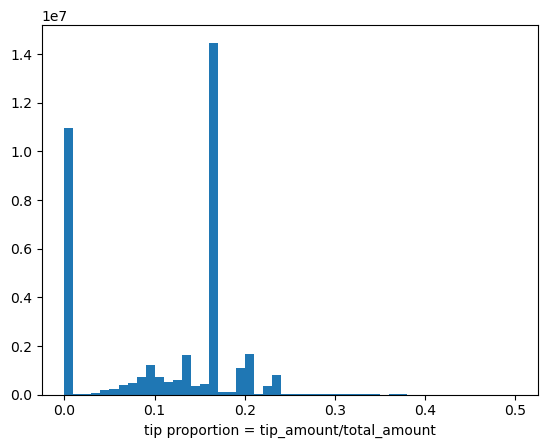

In [41]:
plt.hist(df['tip_amount']/df['total_amount'], bins=50, range=(0,0.5))
plt.xlabel('tip proportion = tip_amount/total_amount')
plt.savefig('../plots/tip_proportion.png')
plt.show()

In [42]:
df.groupby('RatecodeID').count()['tip_amount']

RatecodeID
1.0    36288291
2.0      906250
3.0       73008
4.0        2611
5.0      108893
6.0          35
Name: tip_amount, dtype: int64

In [43]:
df.loc[df['tip_amount']>0].groupby('RatecodeID').count()['tip_amount']

RatecodeID
1.0    25725625
2.0      671525
3.0       55263
4.0        1181
5.0       25734
6.0           8
Name: tip_amount, dtype: int64

### Impact of snow

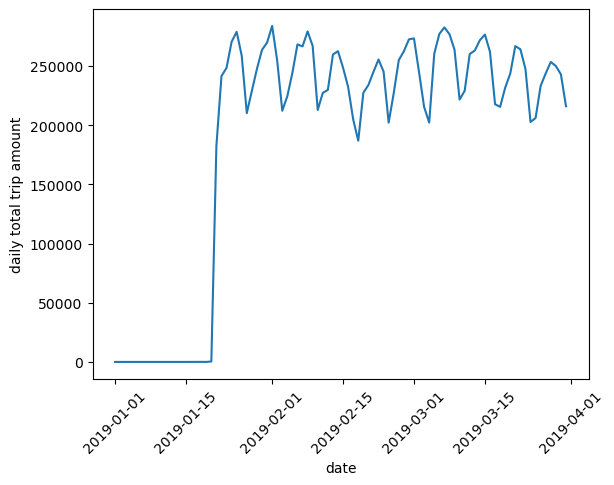

In [27]:
plt.plot(df.loc[df['tpep_pickup_datetime'].dt.month<=3].groupby(df['tpep_pickup_datetime'].dt.date).groups.keys(), df.loc[df['tpep_pickup_datetime'].dt.month<=3].groupby(df['tpep_pickup_datetime'].dt.date).count()['dpm'])
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('daily total trip amount')
plt.savefig('../plots/dailyntrips_1-3.png')
plt.show()

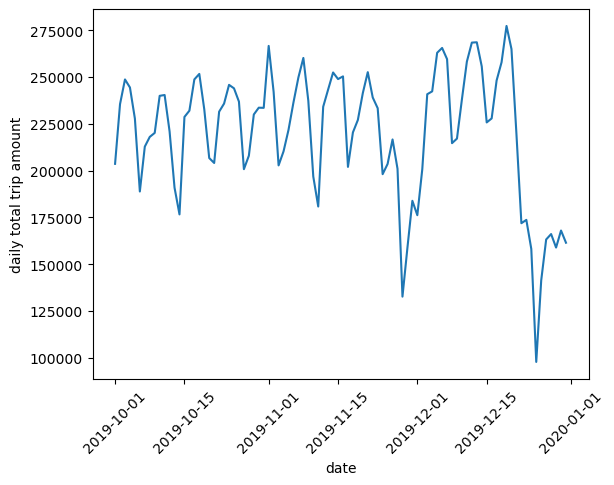

In [29]:
plt.plot(df.loc[df['tpep_pickup_datetime'].dt.month>=10].groupby(df['tpep_pickup_datetime'].dt.date).groups.keys(), df.loc[df['tpep_pickup_datetime'].dt.month>=10].groupby(df['tpep_pickup_datetime'].dt.date).count()['dpm'])
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('daily total trip amount')
plt.savefig('../plots/dailyntrips_10-12.png')
plt.show()

In [30]:
df.loc[df['tpep_pickup_datetime'].dt.month==1].groupby(df['tpep_pickup_datetime'].dt.date).count()['total_amount']

tpep_pickup_datetime
2019-01-01         1
2019-01-03         4
2019-01-05         4
2019-01-15         1
2019-01-18        51
2019-01-19         4
2019-01-20       359
2019-01-21    182659
2019-01-22    241522
2019-01-23    248470
2019-01-24    270502
2019-01-25    278918
2019-01-26    258698
2019-01-27    210261
2019-01-28    229070
2019-01-29    247632
2019-01-30    263659
2019-01-31    269824
Name: total_amount, dtype: int64

In [36]:
snow_df = pd.read_csv('../preprocessed_data/SNOW.csv')
snow_df['date'] = pd.to_datetime(snow_df['date'], format='%Y%m%d')
print(snow_df.dtypes)
snow_df.tail()

date     datetime64[ns]
value             int64
dtype: object


,date,value
1155,2019-12-29,0
1156,2019-12-29,0
1157,2019-12-30,0
1158,2019-12-30,0
1159,2019-12-31,0


In [37]:
snow_df = snow_df.loc[snow_df['date'].dt.month.isin([1,2,3,10,11,12])]
snow_df.shape

(625, 2)

In [38]:
snow_df.groupby('date').mean().reset_index().sort_values('value', ascending=False).head(20)

,date,value
60,2019-03-04,83.800000
58,2019-03-02,80.400000
49,2019-02-21,36.750000
151,2019-12-03,25.750000
41,2019-02-13,22.666667
159,2019-12-11,11.600000
57,2019-03-01,11.500000
15,2019-01-18,7.800000
17,2019-01-20,4.333333
28,2019-01-31,4.000000
